[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ignaziogallo/data-mining/blob/aa20-21/tutorials/tutorials/normalization/Data_Preprocessing-Normalization.ipynb)

# Data Preprocessing - Normalization
* Data Normalization involves adjusting values measured on different scales to a common scale. 
* When dealing with dataframes, data normalization permits to adjust values referred to different columns to a common scale. 
* This operation is strongly recommended when the columns of a dataframe are considered as input features of a machine learning algorithm, because it permits to give **all the features** the **same weight**.

* Normalization applies only to columns containing numeric values. 

In the remainder of the tutorial, we apply five different methods to single columns.  
However, if you wanted to use each column of the dataset as input features of a machine learning algorithm, you should apply the same normalization method to all the columns. 

In this tutorial, we use the `pandas` library to perform normalization. As an alternative, you could use the [preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) methods of the `scikit-learn` libray. 


## Data Import
As example dataset, in this tutorial we consider the dataset provided by the Italian Protezione Civile, related to the number of COVID-19 cases registered since the beginning of the COVID-19 pandemic. The dataset is updated daily and can be downloaded from [this link](https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv).

* First of all, we need to import the Python `pandas` library and read the dataset through the `read_csv()` function. 
* Then we can drop all the columns with `NaN` values. This is done through `dropna()` function. 

In [42]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8400 entries, 0 to 8399
Data columns (total 30 columns):
data                                      8400 non-null object
stato                                     8400 non-null object
codice_regione                            8400 non-null int64
denominazione_regione                     8400 non-null object
lat                                       8400 non-null float64
long                                      8400 non-null float64
ricoverati_con_sintomi                    8400 non-null int64
terapia_intensiva                         8400 non-null int64
totale_ospedalizzati                      8400 non-null int64
isolamento_domiciliare                    8400 non-null int64
totale_positivi                           8400 non-null int64
variazione_totale_positivi                8400 non-null int64
nuovi_positivi                            8400 non-null int64
dimessi_guariti                           8400 non-null int64
deceduti          

In [44]:
df.dropna(axis=1,inplace=True)
df.head(10)

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,0,5
1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0,0
2,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,0,1
3,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,0,10
4,2020-02-24T18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,18,0,18,0,0,18,148
5,2020-02-24T18:00:00,ITA,6,Friuli Venezia Giulia,45.649435,13.768136,0,0,0,0,0,0,0,0,0,0,58
6,2020-02-24T18:00:00,ITA,12,Lazio,41.892770,12.483667,1,1,2,0,2,0,2,1,0,3,124
7,2020-02-24T18:00:00,ITA,7,Liguria,44.411493,8.932699,0,0,0,0,0,0,0,0,0,0,1
8,2020-02-24T18:00:00,ITA,3,Lombardia,45.466794,9.190347,76,19,95,71,166,0,166,0,6,172,1463
9,2020-02-24T18:00:00,ITA,11,Marche,43.616760,13.518875,0,0,0,0,0,0,0,0,0,0,16


## Single Feature Scaling
Single Feature Scaling converts every value of a column into a number between 0 and 1. 
* The new value is calculated as the current value divided by the `max value` of the column. 
$$x_{new} = \frac{x} {\max_i{x_i}}$$

For example, if we consider the column `tamponi`, we can apply the single feature scaling by applying to the column the function `max()`, whic calculates the maximum value of the column:

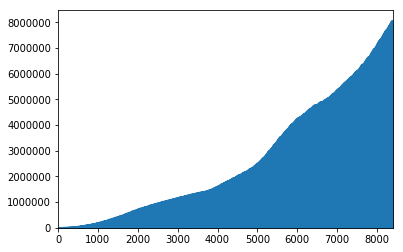

In [45]:
df2=df[['tamponi']].copy()
df2['tamponi'].plot.area()

In [46]:
df2['tamponi'] = df2['tamponi']/df2['tamponi'].max()

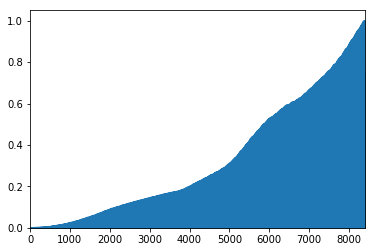

In [47]:
df2['tamponi'].plot.area()

## Compare features

Normalization helps us to better compare the features of a dataset.

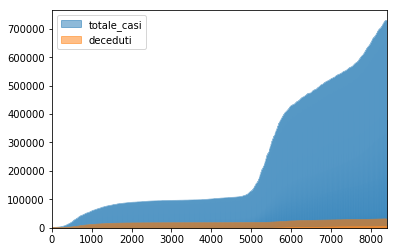

In [48]:
import matplotlib.pyplot as plt

df2=df[['totale_casi','deceduti']].copy()
df2.plot(kind='area', stacked=False)
plt.show(block=True);

In [49]:
df2['totale_casi'] = df2['totale_casi']/df2['totale_casi'].max()
df2['deceduti'] = df2['deceduti']/df2['deceduti'].max()

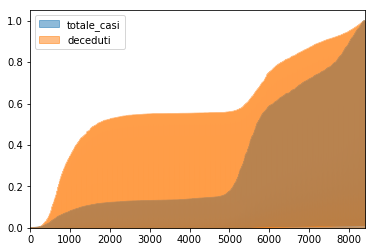

In [50]:
df2.plot(kind='area', stacked=False)
plt.show(block=True);

In [51]:
df2['totale_casi'].max()

1.0

## Min Max
Similarly to Single Feature Scaling, Min Max converts every value of a column into a number between 0 and 1. 
* The new value is calculated as the difference between the current value and the min value, divided by the range of the column values
$$x_{new} = \frac{x - \min_i{x_i}} {\max_i{x_i}- \min_i{x_i}}$$

For example, we can apply the min max method to the column `totale_casi`.

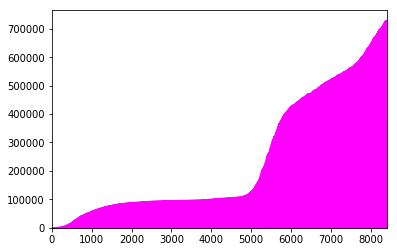

In [52]:
df2=df[['totale_casi']].copy()
df2['totale_casi'].plot.area(colormap="spring")

In [53]:
df2['totale_casi'] = (df2['totale_casi'] - df2['totale_casi'].min())/(df2['totale_casi'].max() - df2['totale_casi'].min())

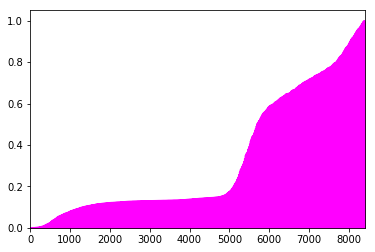

In [54]:
df2['totale_casi'].plot.area(colormap="spring")

## z-score
Z-Score converts every value of a column into a number around 0.  
Typical values obtained by a z-score transformation range from -3 and 3. 
* The new value is calculated as the difference between the current value and the average value, divided by the standard deviation. 
$$x_{new} = \frac{x - \text{mean}(x)} {\text{std}(x)}$$ 
$$\text{mean}(x) = \frac{1}{N}\sum_{i=1}^N{x_i}$$
$$\text{std}(x) = \sqrt{\sum_{i=1}^N{(x_i-\text{mean}(x))^2}}$$

The average value of a column can be obtained through the `mean()` function, while the standard deviation through the `std()` function. For example, we can calculate the z-score of the column `deceduti`.

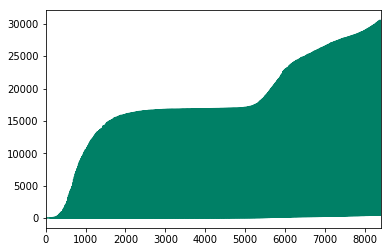

In [55]:
df2=df[['deceduti']].copy()
df2['deceduti'].plot.line(colormap="summer")

In [56]:
df2['deceduti'] = (df2['deceduti']-df2['deceduti'].mean())/df2['deceduti'].std()

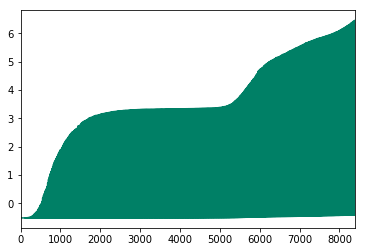

In [57]:
df2['deceduti'].plot.line(colormap="summer")

Now we can calculate the minimum and maximum value obtained by the z-score transformation:

In [58]:
df2['deceduti'].min()

-0.5085441585795114

In [59]:
df2['deceduti'].max()

6.463125196783334

## Log Scaling
Log Scaling involves the conversion of a column to the logarithmic scale. 
$$x_{new} = \log{x}$$ 

If we want to use the natural logarithm, we can use the `log()` function of the `numpy` library.  
For example, we can apply log scaling to the column `dimessi_guariti`. We must deal with `log(0)` because it does not exist. We use the `lambda` operator to select the single rows of the column.

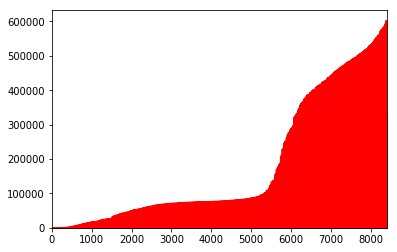

In [60]:
df2=df[['dimessi_guariti']].copy()
df2['dimessi_guariti'].plot.area(colormap="autumn")

In [61]:
import numpy as np

df2['dimessi_guariti'] = df2['dimessi_guariti'].apply(lambda x: np.log(x) if x != 0 else 0)

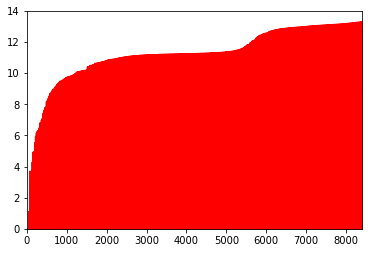

In [62]:
df2['dimessi_guariti'].plot.area(colormap="autumn")

## Clipping
Clipping involves the capping of all values **below or above a certain value**.  
Clipping is useful when a column contains some **outliers**. 

We can set a maximum `vmax` and a minimum value `vmin` and set all outliers greater than the maximum value to `vmax` and all the outliers lower than the minimum value to `vmin`.  
For example, we can consider the column `ricoverati_con_sintomi` and we can set `vmax = 10000` and `vmin = 10`.

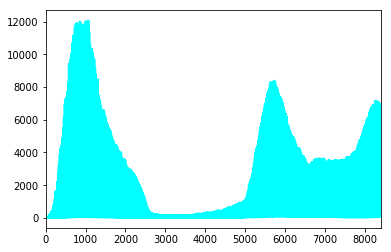

In [63]:
df2=df[['ricoverati_con_sintomi']].copy()
df2['ricoverati_con_sintomi'].plot(colormap="cool")

In [64]:
vmax = 10000
vmin = 300

df2['ricoverati_con_sintomi'] = df2['ricoverati_con_sintomi'].apply(lambda x: vmax if x > vmax else vmin if x < vmin else x)

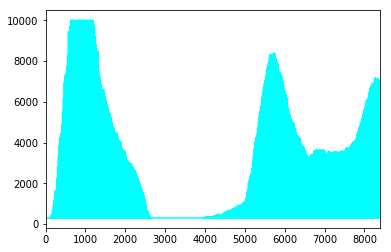

In [65]:
df2['ricoverati_con_sintomi'].plot(colormap="cool")

## References

* [Data Preprocessing - Normalization](https://github.com/alod83/data-science/blob/master/Preprocessing/Normalization/Data%20Preprocessing%20-%20Normalization.ipynb)